# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [3]:
data = load_boston() # load dataset

X = data.data
y = data.target
columns = data.feature_names

## Linear regression

#### 1. [0.5 points] 
Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [4]:
df = pd.DataFrame(X, columns=columns)
df['target'] = y
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=0)

---
#### 2. [1 point] 
Train models on train data using StatsModels( or sckit-learn) library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def add_constant(arr):
    return np.c_[arr, np.ones((arr.shape[0], 1))]

scaler = StandardScaler().fit(train[columns])
trainX, testX = scaler.transform(train[columns]), scaler.transform(test[columns])
trainY, testY = train['target'], test['target']
trainXc = add_constant(trainX)
testXс = add_constant(testX)

models = {}
def run_model(model):
    name = type(model).__name__
    models[name] = reg = model.fit(trainXc, trainY)
    prediction = reg.predict(testXс)
    rmse = mean_squared_error(testY, prediction, squared=False)
    r2 = r2_score(testY, prediction)
    print(f"{name: <16} RMSE {rmse:.5f} R² {r2:.5f}")
    return reg

run_model(LinearRegression(fit_intercept=False))
run_model(Ridge(0.01, fit_intercept=False))
run_model(Lasso(0.01, fit_intercept=False))
pass

LinearRegression RMSE 5.78351 R² 0.58922
Ridge            RMSE 5.78361 R² 0.58921
Lasso            RMSE 5.79609 R² 0.58743


---
#### 3. [1 point] 
Explore the values of the parameters of the resulting models and compare the number of zero weights in them. 

Comment on the significance of the coefficients, overal model significance and other related factors from the results table. 

`Hint` Use StatModels to obtain significance of the coefficients. They ca be found on the `summary` of the fitted linear model. 
It might be tricky to obtain `summary` for the regularized model. Please, read the documentation of the StatModels library to figure out how to do that, e.g.   [OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults) class might be useful here.

In [7]:
print(models['LinearRegression'].coef_)
print(models['Ridge'].coef_)
print(models['Lasso'].coef_)

[-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482 22.61188119]
[-0.97073209  1.05698134  0.03803375  0.59455017 -1.85478991  2.57332859
 -0.08769363 -2.88061155  2.11145769 -1.87461001 -2.29266974  0.71818063
 -3.59228891 22.6113215 ]
[-0.93978318  1.02379427 -0.          0.59493689 -1.80527062  2.58451328
 -0.06803866 -2.81157046  1.9540071  -1.73716215 -2.27791791  0.70474855
 -3.59775918 22.60188119]


Ровные нули у нас есть только в модели Lasso, потому что в этом весь её смысл: она выбрасывает достаточно маленькие значения и заменяет их на нули.
Ноль получился только один: `x3`, и он самый маленький во всех остальных моделях.
Ещё есть `x7`, но он недостаточно маленький, чтобы его Lasso округлил в ноль.

In [8]:
# чтобы достать significance of the coefficients нужно пересоздать все модели в statsmodels.api
import statsmodels.api as sm

linreg_model = sm.OLS(trainY, trainXc).fit()
ridge_model = sm.OLS(trainY, trainXc).fit_regularized(alpha=0.01, L1_wt=1e-16, refit=True) # c L1_wt=0 не работает 🙁
lasso_model = sm.OLS(trainY, trainXc).fit_regularized(alpha=0.01, L1_wt=1, refit=True)

linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     102.2
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          9.64e-117
Time:                        19:51:55   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9708      0.298     -3.257      0.001      -1.557      -0.385
x2             1.0571      0.341      3.102      0.002       0.387       1.727
x3             0.0383      0.443      0.087      0.931      -0.832       0.909
x4             0.5945      0.229      2.595      0.010       0.144       1.045
x5            -1.8551      0.485     -3.828      0.000      -2.808      -0.902
x6             2.5732      0.317      8.106      0.000       1.949       3.197
x7            -0.0876      0.402     -0.218      0.828      -0.878       0.703
x8            -2.8809      0.445     -6.480      0.000      -3.755      -2.007
x9             2.1122      0.607      3.481      0.001       0.919       3.305
x10           -1.8753      0.665     -2.819      0.005      -3.183      -0.567
x11           -2.2928      0.300     -7.636      0.000      -2.883      -1.702
x12            0.7182      0.261      2.749      0.006       0.204       1.232
x13           -3.5925      0.395     -9.086      0.000      -4.370      -2.815
const         22.6119      0.223    101.576      0.000      22.174      23.050
==============================================================================
Omnibus:                      141.494   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.882
Skew:                           1.470   Prob(JB):                    1.67e-137
Kurtosis:                       8.365   Cond. No.                         9.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
ridge_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     94.87
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          4.81e-116
Time:                        19:51:55   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2373.
Df Residuals:                     390   BIC:                             2433.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9708      0.298     -3.257      0.001      -1.557      -0.385
x2             1.0571      0.341      3.102      0.002       0.387       1.727
x3             0.0383      0.443      0.087      0.931      -0.832       0.909
x4             0.5945      0.229      2.595      0.010       0.144       1.045
x5            -1.8551      0.485     -3.828      0.000      -2.808      -0.902
x6             2.5732      0.317      8.106      0.000       1.949       3.197
x7            -0.0876      0.402     -0.218      0.828      -0.878       0.703
x8            -2.8809      0.445     -6.480      0.000      -3.755      -2.007
x9             2.1122      0.607      3.481      0.001       0.919       3.305
x10           -1.8753      0.665     -2.819      0.005      -3.183      -0.567
x11           -2.2928      0.300     -7.636      0.000      -2.883      -1.702
x12            0.7182      0.261      2.749      0.006       0.204       1.232
x13           -3.5925      0.395     -9.086      0.000      -4.370      -2.815
const         22.6119      0.223    101.576      0.000      22.174      23.050
==============================================================================
Omnibus:                      141.494   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.882
Skew:                           1.470   Prob(JB):                    1.67e-137
Kurtosis:                       8.365   Cond. No.                         9.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
lasso_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     102.4
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          4.67e-117
Time:                        19:51:55   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     391   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9718      0.297     -3.267      0.001      -1.557      -0.387
x2             1.0546      0.339      3.110      0.002       0.388       1.721
x3                  0          0        nan        nan           0           0
x4             0.5963      0.228      2.616      0.009       0.148       1.044
x5            -1.8443      0.468     -3.944      0.000      -2.764      -0.925
x6             2.5707      0.316      8.142      0.000       1.950       3.191
x7            -0.0883      0.402     -0.220      0.826      -0.878       0.701
x8            -2.8894      0.433     -6.671      0.000      -3.741      -2.038
x9             2.0956      0.575      3.646      0.000       0.965       3.226
x10           -1.8489      0.590     -3.133      0.002      -3.009      -0.689
x11           -2.2887      0.296     -7.728      0.000      -2.871      -1.706
x12            0.7175      0.261      2.751      0.006       0.205       1.230
x13           -3.5898      0.394     -9.118      0.000      -4.364      -2.816
const         22.6119      0.222    101.706      0.000      22.175      23.049
==============================================================================
Omnibus:                      141.572   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.874
Skew:                           1.470   Prob(JB):                    1.02e-137
Kurtosis:                       8.370   Cond. No.                         9.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

У `x3` и `x7` самые большие pvalue, значит Lasso правильно сделало что викинуло `x3`. А у всех остальных фич pvalue > 0.05, и поэтому их выкидывать ненадо. Вообще без `x3` и `x7` модели выгледять очень красиво, тк везде pvalue очень маленькие. (❁´◡`❁)

---
#### 4. [1 point] 
Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions. 
It's enough to apply to one of the models above (e.g simple linear regression)

In [18]:
def elimination():
    cols = list(columns)
    mse_dict = {} 
    while len(cols):
        scaler = StandardScaler().fit(train[cols])
        trainX, testX = scaler.transform(train[cols]), scaler.transform(test[cols])
        trainY, testY = train['target'], test['target']
        trainXc, testXс = add_constant(trainX), add_constant(testX)

        model = sm.OLS(trainY, trainXc).fit()
        mse = mean_squared_error(testY, model.predict(testXс))
        mse_dict[mse] = cols[:]
        
        del cols[model.pvalues.argmax()]
    
    return mse_dict[min(mse_dict)]

cols = elimination()
print(cols)
print(set(columns) - set(cols))

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
{'AGE', 'INDUS'}


Алгоритм элиминации выкинул колонки только `INDUS` и `AGE`, тоесть `x3` и `x7` -- те же самые, у которых были очень большие pvalue, что логично тк алгорит на них и смотрит. Но он остановился в правильном месте, и оставил все остальные колонки. Для этого ему пришлось по одной удалить все колонки, и потом вернутся на то место где был минимальный MSE. Вроде в задание имелось ввиду что нужно останавливатся после первого ухудшения MSE, но тогда у нас неполучится выкинуть даже первую колонку, с которой даже справился Lasso.

---
#### 5. [1 point] 
Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [12]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(Ridge(), {'alpha': np.logspace(-4, 3)}, scoring='neg_root_mean_squared_error', cv=5)
gscv.fit(trainXc, trainY)
gscv.best_params_

{'alpha': 7.196856730011514}

---
## Gradient descent

#### 6. [3.5 points] 
**Implement a linear regression model for the MSE loss function, trained by gradient descent.**

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} q_{i_{k}} (w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

Exponentially weighed averages can provide a better estimate which is closer to the actual gradient.


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [13]:
from sklearn.base import BaseEstimator
from math import floor

class LinReg(BaseEstimator):
    def __init__(self, delta=0.5, gd_type='Momentum', tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum'
        delta: float
            proportion of object in a batch (fot stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        """
        
        self.h_prev = 0
        self.gd_type = gd_type
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        X = np.array(X)
        y = np.array(y)

        if self.w0 is None:
            self.w0 = np.zeros(X.shape[1]) # + 1
        
        self.w = self.w0
        self.loss_history.append(self.calc_loss(X, y))
        for _ in range(self.max_iter):
            gradient = self.calc_gradient(X, y)
            if np.linalg.norm(gradient) < self.tolerance:
                break
            self.w -= gradient
            self.loss_history.append(self.calc_loss(X, y))
        
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        return X @ self.w.T
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """

        if self.gd_type != 'GradientDescent':
            idxs = np.random.randint(0, y.size, floor(self.delta*y.size))
            X,y = X[idxs,:],y[idxs]

        res = 2/y.size * (self.predict(X) - y).dot(X) * self.eta

        if self.gd_type == 'Momentum':
            res += self.h_prev * self.alpha
            self.h_prev = res

        return res

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return (np.array(self.predict(X) - y)**2).mean()

#### 7. [1 points] 
Train and validate "hand-written" model (simple linear regression) on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [14]:
np.random.seed(0)
run_model(LinearRegression())
run_model(LinReg())
pass

LinearRegression RMSE 5.78351 R² 0.58922
LinReg           RMSE 5.80021 R² 0.58685


Как можно заместить, `sklearn`-овская модель выдаёт RMSE чуть-чуть меньше чем наша, и $R^2$ чуть-чуть больше.
RMSE надо минизировать а $R^2$ максимизировать, то есть наша модель получилась хуже библиотечной, как и следовало ожидать.
Но разница метрик неочень большая, что значит что наша модель всётаки работает, хотя и не так хорошо как библиотечная.

![ура](https://vk.com/sticker/1-13240-128b)

{'alpha': 0.01}


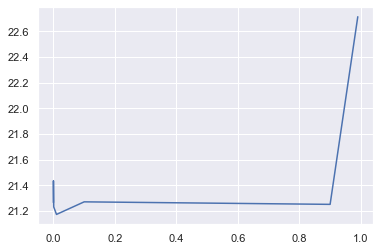

In [15]:
np.random.seed(1)
alphas = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.9, 0.99]
gscv = GridSearchCV(LinReg(), {'alpha': alphas}, scoring='neg_mean_squared_error')
gscv.fit(trainXc, trainY)
print(gscv.best_params_)

plt.plot(alphas, -gscv.cv_results_["mean_test_score"])
plt.show()

Все значения $\alpha$ меньше $0.1$, по-видимому, эквивалентны и их эфиктивность случайно меняется каждый раз,
когда мы строим график заного с другим рандомным сидом.
А для значений больше $0.1$ -- чем ближе они к единице, тем хуже становится их обышка. 

{'max_iter': 1000}


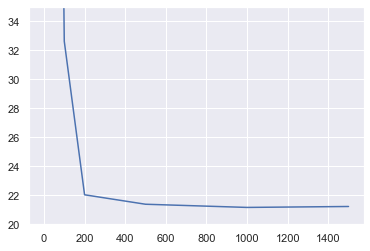

In [16]:
np.random.seed(10)
max_iters = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 1500]
gscv = GridSearchCV(LinReg(), {'max_iter': max_iters}, scoring='neg_mean_squared_error')
gscv.fit(trainXc, trainY)
print(gscv.best_params_)

plt.plot(max_iters, -gscv.cv_results_["mean_test_score"])
plt.ylim(20, 35)
plt.show()

Значния `max_iter` меньше 200 дают ужасные результаты, а после 500та нету ощутимых улучшений.

#### 8. [1 points] 
Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

LinReg           RMSE 5.88944 R² 0.57404
LinReg           RMSE 6.14469 R² 0.53631
LinReg           RMSE 5.89860 R² 0.57271
LinReg           RMSE 5.93354 R² 0.56763


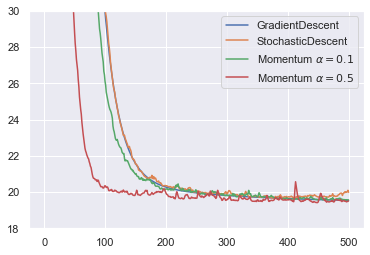

In [17]:
np.random.seed(0)
prams = dict(delta=0.1, max_iter=500)
gd = run_model(LinReg(gd_type='GradientDescent', **prams))
sgd = run_model(LinReg(gd_type='StochasticDescent', **prams))
msgd1 = run_model(LinReg(gd_type='Momentum', **prams, alpha=0.1))
msgd5 = run_model(LinReg(gd_type='Momentum', **prams, alpha=0.5))

x = np.array(range(len(gd.loss_history)))
plt.plot(x, gd.loss_history, label="GradientDescent")
plt.plot(x, sgd.loss_history, label="StochasticDescent")
plt.plot(x, msgd1.loss_history, label=r"Momentum $\alpha = 0.1$")
plt.plot(x, msgd5.loss_history, label=r"Momentum $\alpha = 0.5$")
plt.ylim(18, 30)
plt.legend()
plt.show()

Моментум, особенно с большой $\alpha$, очень быстро находит относительно адекватное значение, но потом рандомно колеблется около оптимального значения, но, в отличие от `StochasticDescent`-а, в конце концов в него поподает.
Только обычный `GradientDescent` вообще кудато сходится, все остальные просто колеблятся.